In [1]:
import sklearn

In [2]:
import pandas as pd

In [3]:
import numpy as np 

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.metrics import mean_squared_error , explained_variance_score , max_error, mean_absolute_error, mean_squared_log_error, median_absolute_error , r2_score

In [6]:
df = pd.read_csv("training.csv")

In [7]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [8]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [9]:
df.shape

(250000, 33)

In [10]:
df = df.replace(-999, np.nan)

In [11]:
df = df.dropna()

In [12]:
df.shape

(68114, 33)

Text(0, 0.5, 'Events')

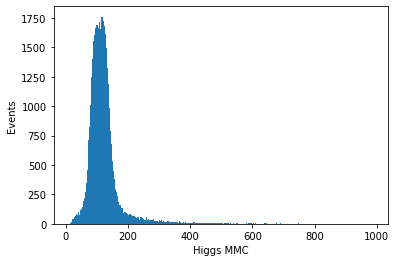

In [13]:
n, bins, patches = plt.hist(x=df['DER_mass_MMC'], bins='auto')
plt.xlabel("Higgs MMC")
plt.ylabel("Events")
#plt.ylim(ymax=8000)
#plt.xlim(xmin =0,xmax=800)

Text(0, 0.5, 'Events')

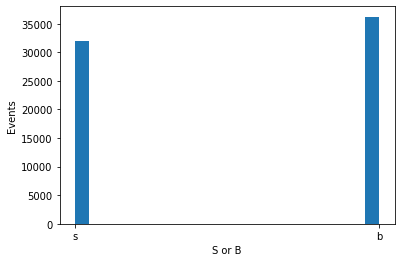

In [14]:
n, bins, patches = plt.hist(x=df['Label'], bins='auto')
plt.xlabel("S or B")
plt.ylabel("Events")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b9d2d90>,
      dtype=object)

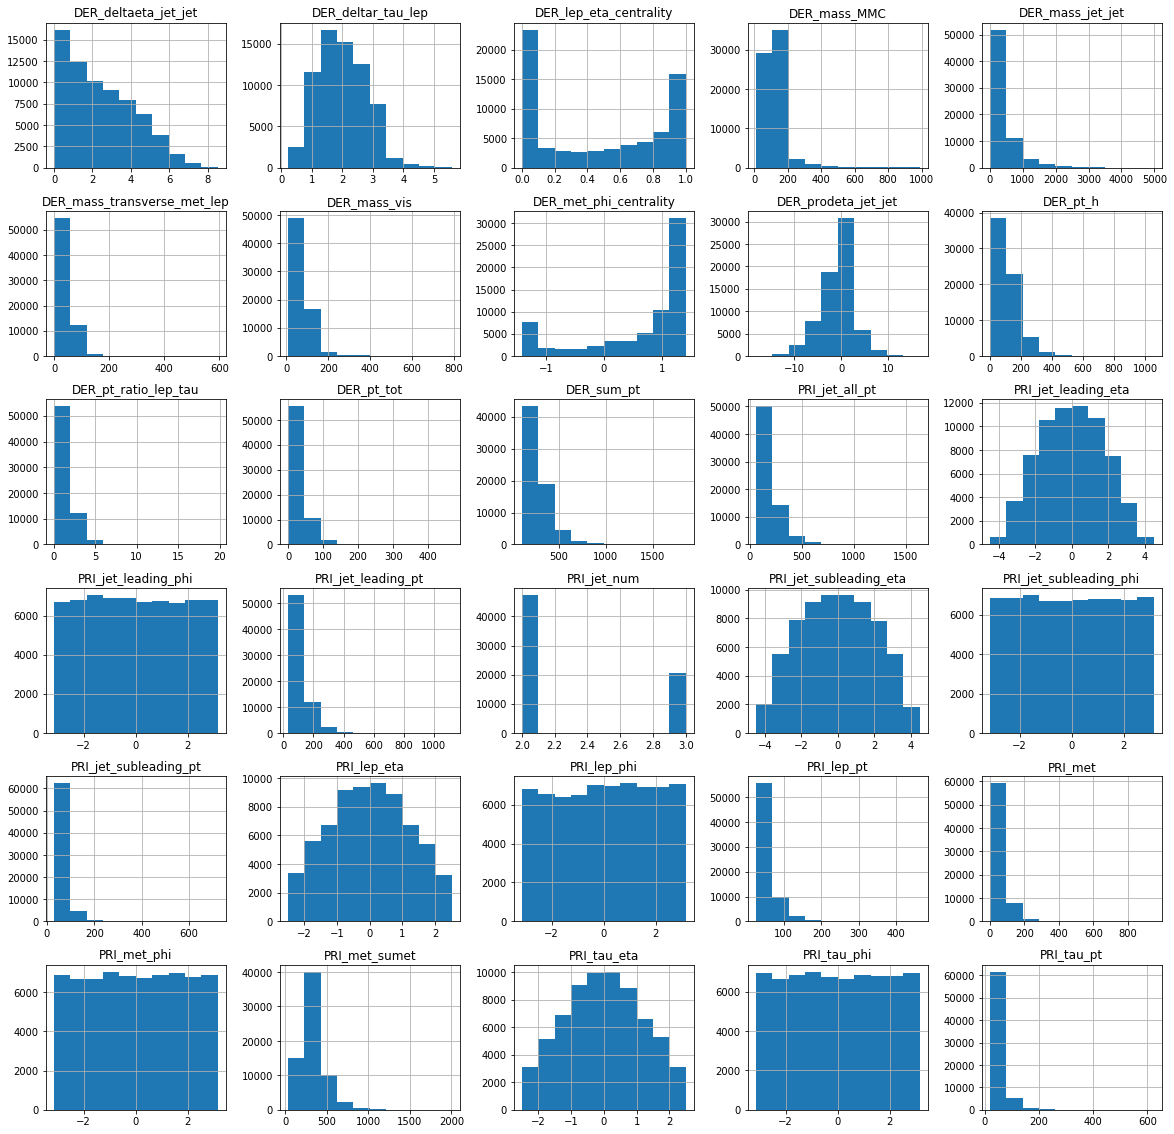

In [15]:
df_droped = df.drop(['EventId', 'Label','Weight'], axis=1)
df_droped.hist(figsize=(20, 20))

In [15]:
from sklearn.model_selection import train_test_split

df_droped = df.drop(['Weight', 'Label' , 'EventId'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_droped.drop(["DER_mass_MMC"], axis=1), df_droped["DER_mass_MMC"], test_size=0.2, random_state=0)

In [17]:
X_test.head()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
195062,36.686,69.990,86.525,0.025,108.756,0.087,2.689,23.164,207.301,3.018,...,-0.715,269.298,2,82.133,0.283,1.592,42.219,0.307,-2.445,124.352
19447,15.062,66.468,57.731,5.063,594.116,-6.397,2.940,6.334,151.194,1.754,...,1.120,195.275,2,51.427,2.643,-1.145,43.186,-2.420,-3.128,94.612
123796,11.300,108.501,10.687,4.589,785.494,-4.031,3.259,2.302,253.788,0.600,...,-1.508,272.160,2,80.002,3.405,-0.009,76.572,-1.184,2.976,156.574
176187,28.642,30.769,120.084,3.625,419.743,-2.691,1.084,26.618,200.373,1.907,...,1.151,238.831,2,72.996,2.584,-2.900,65.036,-1.041,-1.622,138.032
104263,7.875,58.398,172.267,0.141,314.673,-0.004,1.510,24.538,443.391,1.669,...,0.218,503.328,2,241.025,-0.099,2.836,123.404,0.042,-1.196,364.428


In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.coef_

array([ 2.62589082e-02,  1.32515230e+00, -9.33774995e-02, -3.06010489e-01,
        1.30474519e-03, -3.04736520e-03,  1.08908724e+01,  1.49686082e-02,
       -6.96334477e+01, -1.25400489e+00,  8.77992563e+00,  1.92649385e-01,
        6.97305447e+01,  2.73408643e-01,  1.05767367e-02,  6.95906565e+01,
       -2.23419578e-01,  4.80818437e-02,  5.45013566e-01,  5.18850004e-02,
       -2.26321874e-03,  1.01111907e+00, -1.80533283e-02, -7.90154366e-03,
        5.98859149e-02,  2.62054886e-02, -8.74908171e-03,  1.10847343e-01,
        6.96169618e+01])

In [22]:
y_pred = model.predict(X_test) 

In [23]:
model.score(X_test, y_test)

0.8827037617288149

In [24]:
mse = mean_squared_error(y_test, y_pred)

406.6972608556704

In [36]:
reg_metrics = [mean_squared_error, explained_variance_score , max_error, mean_absolute_error, median_absolute_error , r2_score]
for met in reg_metrics:
    score = met(y_test, y_pred)
    print(round(score,2))

406.7
0.88
624.79
9.55
5.76
0.88


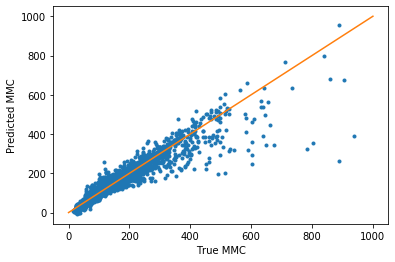

In [27]:
plt.plot(y_test, y_pred, '.')
x = np.linspace(0, 1000, 1000)
y = x
plt.plot(x, y)
plt.xlabel("True MMC")
plt.ylabel("Predicted MMC")
plt.show()

Text(0, 0.5, 'Events')

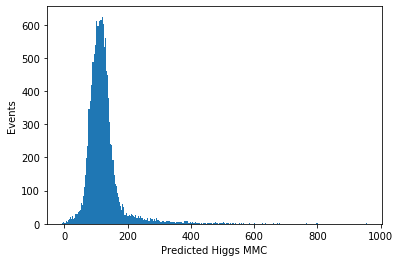

In [48]:
n, bins, patches = plt.hist(x=y_pred, bins='auto')
plt.xlabel("Predicted Higgs MMC")
plt.ylabel("Events")

In [37]:
#Let's try other available ML algorithms 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [39]:
modelGBR = GradientBoostingRegressor(random_state=1, n_estimators=5)
modelRFR = RandomForestRegressor(random_state=1, n_estimators=5)

In [40]:
modelGBR.fit(X_train, y_train)
modelRFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [41]:
y_predGBR = modelGBR.predict(X_test)
y_predRFR = modelRFR.predict(X_test)

In [42]:
scoreGBR = modelGBR.score(X_test, y_test)
scoreRFR = modelRFR.score(X_test, y_test)

In [43]:
print("scoreGBR",scoreGBR)
print("scoreRFR",scoreRFR)

scoreGBR 0.4985019920350149
scoreRFR 0.9231172256529084


In [45]:
for met in reg_metrics:
    score = met(y_test, y_predRFR)
    print(round(score,2))

266.57
0.92
563.42
6.57
3.06
0.92


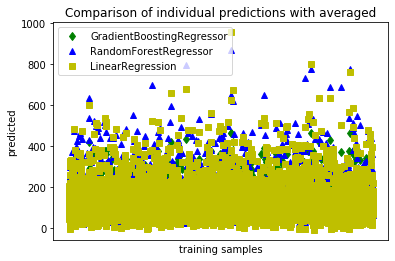

In [54]:
plt.figure()
plt.plot(y_predGBR, 'gd', label='GradientBoostingRegressor')
plt.plot(y_predRFR, 'b^', label='RandomForestRegressor')
plt.plot(y_pred, 'ys', label='LinearRegression')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

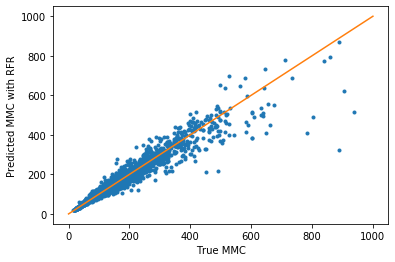

In [55]:
plt.plot(y_test, y_predRFR, '.')
x = np.linspace(0, 1000, 1000)
y = x
plt.plot(x, y)
plt.xlabel("True MMC")
plt.ylabel("Predicted MMC with RFR")
plt.show()

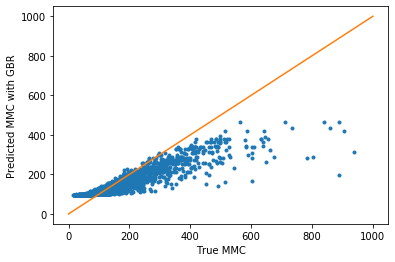

In [56]:
plt.plot(y_test, y_predGBR, '.')
x = np.linspace(0, 1000, 1000)
y = x
plt.plot(x, y)
plt.xlabel("True MMC")
plt.ylabel("Predicted MMC with GBR")
plt.show()

In [69]:
modelGBRs = []
modelRFRs = []
scoreGBRs = []
scoreRFRs = []
for n_est in [5,10,15,20,30,50,100]:
    modelGBR = GradientBoostingRegressor(random_state=1, n_estimators=n_est)
    modelRFR = RandomForestRegressor(random_state=1, n_estimators=n_est)
    modelGBR.fit(X_train, y_train)
    modelRFR.fit(X_train, y_train)
    modelGBRs.append(modelGBR)
    modelRFRs.append(modelRFR)
    scoreGBR = modelGBR.score(X_test, y_test)
    scoreRFR = modelRFR.score(X_test, y_test)
    scoreGBRs.append([n_est,scoreGBR])
    scoreRFRs.append([n_est,scoreRFR])
    print(n_est,scoreGBR , scoreRFR)

5 0.4985019920350149 0.9231172256529084
10 0.6998617979235622 0.9317325629438772
15 0.7873843272369039 0.9345697300421514
20 0.834009226664446 0.935424755547482
30 0.879867229008754 0.9366187890303286
50 0.9106879339975704 0.9360943940454998
100 0.9295306016923905 0.9376290561305639


0 5
1 10
2 15
3 20
4 30
5 50
6 100


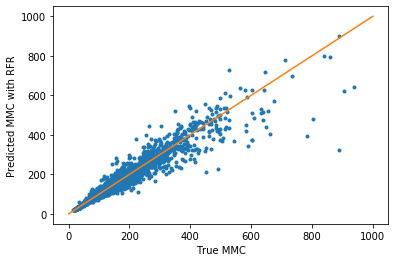

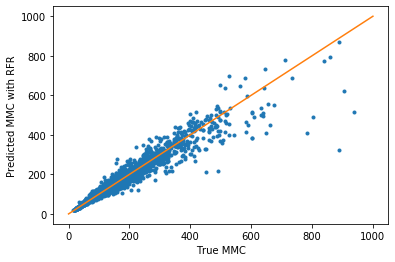

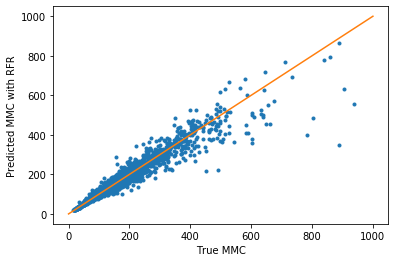

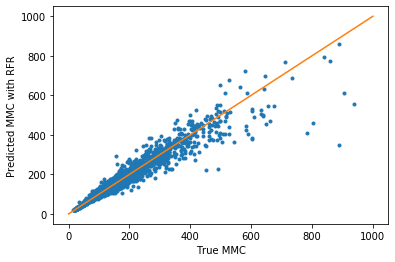

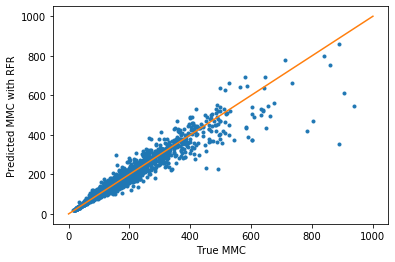

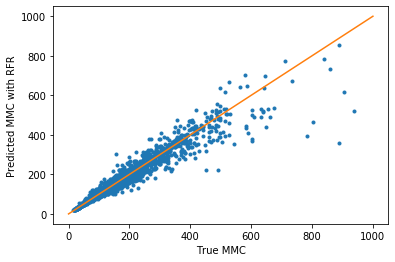

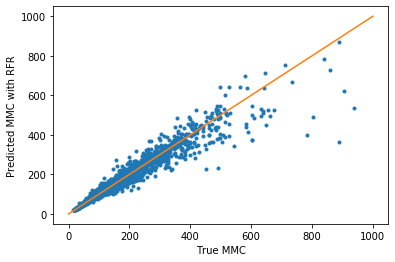

In [73]:
for i,n_est in enumerate([5,10,15,20,30,50,100]):
    print(i,n_est)
    f = plt.figure()
    plt.plot(y_test, modelRFRs[i].predict(X_test), '.')
    x = np.linspace(0, 1000, 1000)
    y = x
    plt.plot(x, y)
    plt.xlabel("True MMC")
    plt.ylabel("Predicted MMC with RFR")
    f.savefig("comparisonRFR_nest_"+str(n_est)+".pdf")

In [46]:
import xgboost as xgb


In [18]:
from sklearn import ensemble

In [39]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'quantile'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='quantile', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
y_predCLF = clf.predict(X_test)
mse = mean_squared_error(y_test, y_predCLF)

In [41]:
print(round(mse,3))

378.498


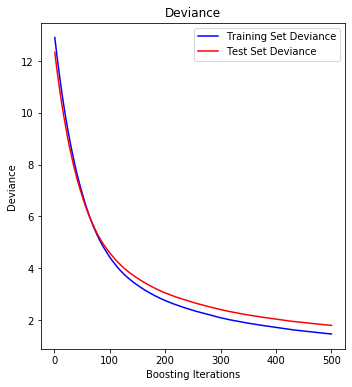

In [42]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

f = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
f.savefig("Deviancefordepth"+str(params['max_depth'])+"_"+params['loss']+".pdf")

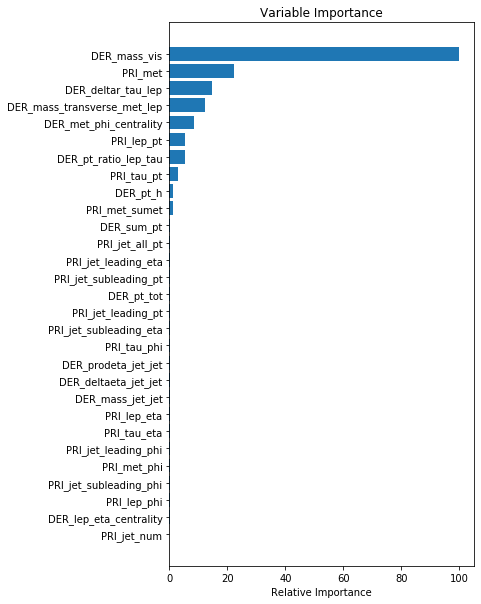

In [43]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
f = plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
f.savefig("Importancefordepth"+str(params['max_depth'])+"_"+params['loss']+".pdf")

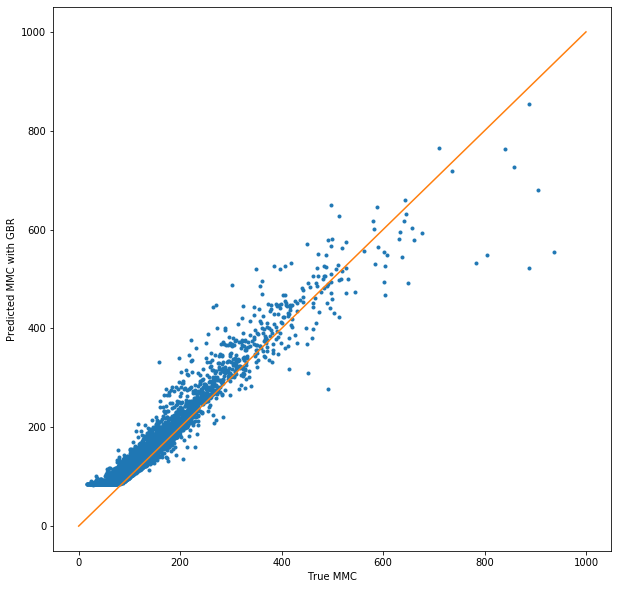

In [44]:
f = plt.figure(figsize=(10, 10))
plt.plot(y_test, y_predCLF, '.')
x = np.linspace(0, 1000, 1000)
y = x
plt.plot(x, y)
plt.xlabel("True MMC")
plt.ylabel("Predicted MMC with GBR")
plt.show()
f.savefig("Comparisonfordepth"+str(params['max_depth'])+"_"+params['loss']+".pdf")

ModuleNotFoundError: No module named 'tensorflow'